In [8]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

import keras
import numpy as np
import os
from six.moves import xrange

import tensorflow as tf
from tensorflow.python.platform import app
from tensorflow.python.platform import flags

from cleverhans.utils_mnist import data_mnist
from cleverhans.utils_tf import model_train, model_eval

from cleverhans.attacks import jsma
from cleverhans.attacks_tf import jacobian_graph
from cleverhans.utils import other_classes, cnn_model, pair_visual, grid_visual
from Gnet import G_10, G_11, G_12, G_13

In [2]:
FLAGS = flags.FLAGS

flags.DEFINE_string('train_dir', '/tmp', 'Directory storing the saved model.')
flags.DEFINE_string('filename', 'mnist.ckpt', 'Filename to save model under.')
flags.DEFINE_boolean('viz_enabled', True, 'Enable sample visualization.')
flags.DEFINE_integer('nb_epochs', 6, 'Number of epochs to train model')
flags.DEFINE_integer('batch_size', 128, 'Size of training batches')
flags.DEFINE_integer('nb_classes', 10, 'Number of classification classes')
flags.DEFINE_integer('img_rows', 28, 'Input row dimension')
flags.DEFINE_integer('img_cols', 28, 'Input column dimension')
flags.DEFINE_integer('nb_channels', 1, 'Nb of color channels in the input.')
flags.DEFINE_integer('nb_filters', 64, 'Number of convolutional filter to use')
flags.DEFINE_integer('nb_pool', 2, 'Size of pooling area for max pooling')
flags.DEFINE_integer('source_samples', 10, 'Nb of test set examples to attack')
flags.DEFINE_float('learning_rate', 0.1, 'Learning rate for training')

In [3]:
# Set TF random seed to improve reproducibility
tf.set_random_seed(1234)

###########################################################################
# Define the dataset and model
###########################################################################

# Image dimensions ordering should follow the Theano convention
if keras.backend.image_dim_ordering() != 'tf':
    keras.backend.set_image_dim_ordering('tf')
    print("INFO: '~/.keras/keras.json' sets 'image_dim_ordering' "
          "to 'th', temporarily setting to 'tf'")

# Create TF session and set as Keras backend session
sess = tf.Session()
keras.backend.set_session(sess)
print("Created TensorFlow session and set Keras backend.")

# Get MNIST test data
X_train, Y_train, X_test, Y_test = data_mnist()
print("Loaded MNIST test data.")

# Define input TF placeholder
x = tf.placeholder(tf.float32, shape=(None, 28, 28, 1))
y = tf.placeholder(tf.float32, shape=(None, 10))

Created TensorFlow session and set Keras backend.
X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Loaded MNIST test data.


In [4]:
# Define TF model graph
model_1 = G_11()
predictions_1 = model_1(x)
print("Defined TensorFlow model graph.")

###########################################################################
# Training the model using TensorFlow
###########################################################################

# Train an MNIST model if it does not exist in the train_dir folder
saver = tf.train.Saver()
save_path = '/home/boyuan/Documents/research/Advesarial_examples/Project/store/G11/G11model'
saver.restore(sess, save_path)



Defined TensorFlow model graph.
INFO:tensorflow:Restoring parameters from /home/boyuan/Documents/research/Advesarial_examples/Project/store/G11/G11model


In [5]:
# Evaluate the accuracy of the MNIST model on legitimate test examples
eval_params = {'batch_size': FLAGS.batch_size}
accuracy = model_eval(sess, x, y, predictions_1, X_test, Y_test,
                      args=eval_params)
assert X_test.shape[0] == 10000, X_test.shape
print('Test accuracy on legitimate test examples: {0}'.format(accuracy))

Test accuracy on legitimate test examples: 0.9849


Crafting 10 * 9 adversarial examples
--------------------------------------
Creating adv. example for target class 1
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 0
Current iteration: 10 - Current Prediction: 0
Current iteration: 15 - Current Prediction: 0
Current iteration: 20 - Current Prediction: 0
Current iteration: 25 - Current Prediction: 0
Current iteration: 30 - Current Prediction: 0
Current iteration: 35 - Current Prediction: 0
Unsuccesful


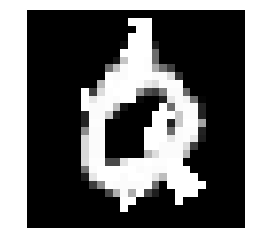

--------------------------------------
Creating adv. example for target class 2
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 0
Current iteration: 10 - Current Prediction: 0
Successful


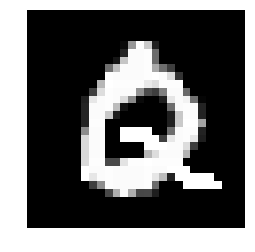

--------------------------------------
Creating adv. example for target class 3
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 0
Current iteration: 10 - Current Prediction: 0
Current iteration: 15 - Current Prediction: 0
Successful


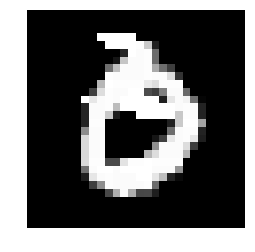

--------------------------------------
Creating adv. example for target class 4
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 0
Current iteration: 10 - Current Prediction: 0
Current iteration: 15 - Current Prediction: 0
Current iteration: 20 - Current Prediction: 0
Current iteration: 25 - Current Prediction: 0
Current iteration: 30 - Current Prediction: 0
Successful


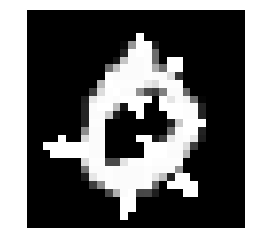

--------------------------------------
Creating adv. example for target class 5
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 0
Current iteration: 10 - Current Prediction: 0
Current iteration: 15 - Current Prediction: 0
Current iteration: 20 - Current Prediction: 0
Current iteration: 25 - Current Prediction: 0
Current iteration: 30 - Current Prediction: 5
Successful


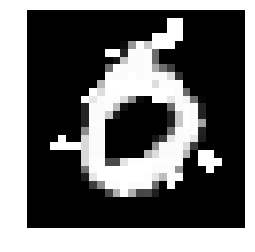

--------------------------------------
Creating adv. example for target class 6
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 0
Current iteration: 10 - Current Prediction: 0
Current iteration: 15 - Current Prediction: 6
Successful


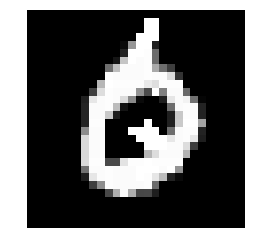

--------------------------------------
Creating adv. example for target class 7
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 0
Current iteration: 10 - Current Prediction: 0
Current iteration: 15 - Current Prediction: 0
Current iteration: 20 - Current Prediction: 0
Current iteration: 25 - Current Prediction: 0
Current iteration: 30 - Current Prediction: 0
Successful


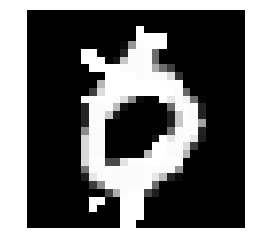

--------------------------------------
Creating adv. example for target class 8
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 0
Current iteration: 10 - Current Prediction: 0
Current iteration: 15 - Current Prediction: 0
Current iteration: 20 - Current Prediction: 0
Successful


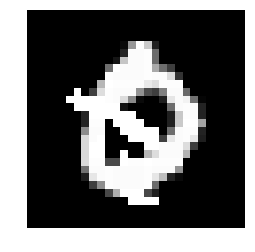

--------------------------------------
Creating adv. example for target class 9
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 0
Current iteration: 10 - Current Prediction: 0
Current iteration: 15 - Current Prediction: 0
Current iteration: 20 - Current Prediction: 0
Current iteration: 25 - Current Prediction: 0
Current iteration: 30 - Current Prediction: 0
Successful


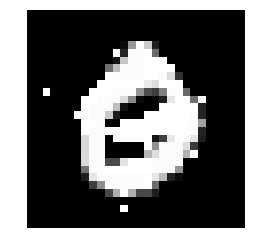

--------------------------------------
Creating adv. example for target class 0
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 1
Current iteration: 10 - Current Prediction: 1
Current iteration: 15 - Current Prediction: 1
Current iteration: 20 - Current Prediction: 6
Current iteration: 25 - Current Prediction: 6
Successful


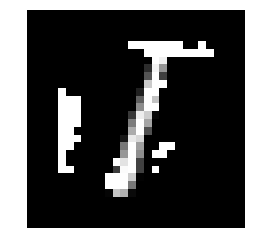

--------------------------------------
Creating adv. example for target class 2
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 1
Current iteration: 10 - Current Prediction: 2
Successful


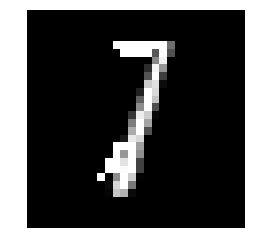

--------------------------------------
Creating adv. example for target class 3
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 1
Current iteration: 10 - Current Prediction: 3
Successful


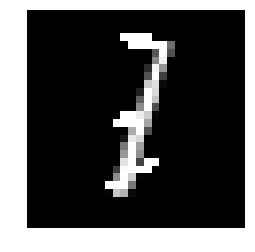

--------------------------------------
Creating adv. example for target class 4
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 1
Successful


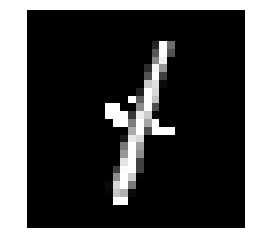

--------------------------------------
Creating adv. example for target class 5
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 1
Current iteration: 10 - Current Prediction: 5
Successful


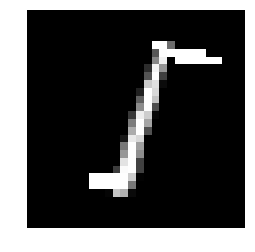

--------------------------------------
Creating adv. example for target class 6
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 1
Current iteration: 10 - Current Prediction: 6
Successful


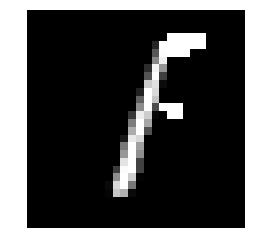

--------------------------------------
Creating adv. example for target class 7
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 1
Current iteration: 10 - Current Prediction: 1
Successful


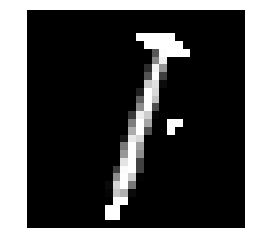

--------------------------------------
Creating adv. example for target class 8
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 1
Successful


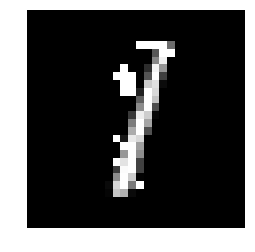

--------------------------------------
Creating adv. example for target class 9
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 1
Current iteration: 10 - Current Prediction: 3
Successful


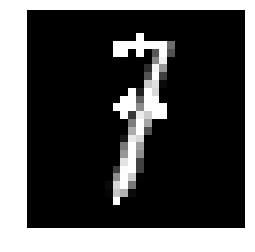

--------------------------------------
Creating adv. example for target class 0
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 2
Current iteration: 10 - Current Prediction: 2
Successful


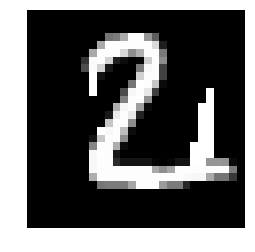

--------------------------------------
Creating adv. example for target class 1
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 2
Current iteration: 10 - Current Prediction: 2
Current iteration: 15 - Current Prediction: 2
Current iteration: 20 - Current Prediction: 2
Current iteration: 25 - Current Prediction: 2
Current iteration: 30 - Current Prediction: 2
Current iteration: 35 - Current Prediction: 2
Successful


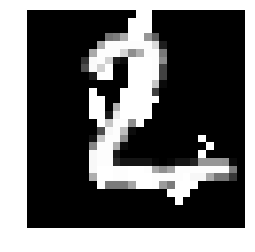

--------------------------------------
Creating adv. example for target class 3
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 2
Current iteration: 10 - Current Prediction: 2
Current iteration: 15 - Current Prediction: 2
Successful


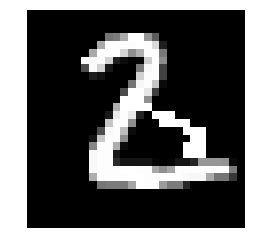

--------------------------------------
Creating adv. example for target class 4
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 2
Current iteration: 10 - Current Prediction: 2
Current iteration: 15 - Current Prediction: 2
Current iteration: 20 - Current Prediction: 2
Current iteration: 25 - Current Prediction: 2
Current iteration: 30 - Current Prediction: 2
Current iteration: 35 - Current Prediction: 2
Unsuccesful


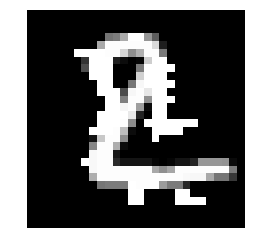

--------------------------------------
Creating adv. example for target class 5
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 2
Current iteration: 10 - Current Prediction: 2
Current iteration: 15 - Current Prediction: 5
Successful


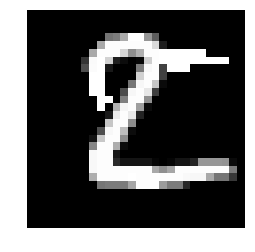

--------------------------------------
Creating adv. example for target class 6
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 2
Current iteration: 10 - Current Prediction: 2
Current iteration: 15 - Current Prediction: 2
Successful


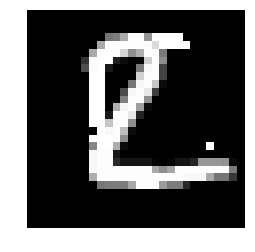

--------------------------------------
Creating adv. example for target class 7
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 2
Current iteration: 10 - Current Prediction: 2
Current iteration: 15 - Current Prediction: 2
Current iteration: 20 - Current Prediction: 2
Current iteration: 25 - Current Prediction: 2
Current iteration: 30 - Current Prediction: 2
Current iteration: 35 - Current Prediction: 2
Unsuccesful


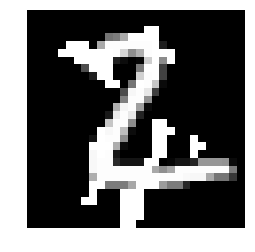

--------------------------------------
Creating adv. example for target class 8
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 2
Current iteration: 10 - Current Prediction: 2
Current iteration: 15 - Current Prediction: 2
Successful


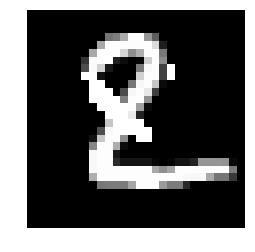

--------------------------------------
Creating adv. example for target class 9
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 2
Current iteration: 10 - Current Prediction: 2
Current iteration: 15 - Current Prediction: 2
Current iteration: 20 - Current Prediction: 2
Current iteration: 25 - Current Prediction: 2
Current iteration: 30 - Current Prediction: 2
Current iteration: 35 - Current Prediction: 2
Successful


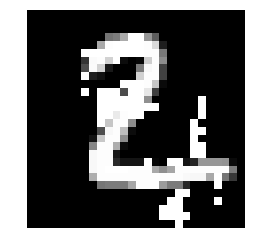

--------------------------------------
Creating adv. example for target class 0
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 3
Current iteration: 10 - Current Prediction: 3
Current iteration: 15 - Current Prediction: 3
Current iteration: 20 - Current Prediction: 8
Current iteration: 25 - Current Prediction: 8
Successful


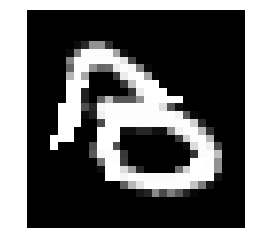

--------------------------------------
Creating adv. example for target class 1
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 3
Current iteration: 10 - Current Prediction: 3
Current iteration: 15 - Current Prediction: 3
Current iteration: 20 - Current Prediction: 3
Current iteration: 25 - Current Prediction: 3
Current iteration: 30 - Current Prediction: 3
Current iteration: 35 - Current Prediction: 3
Successful


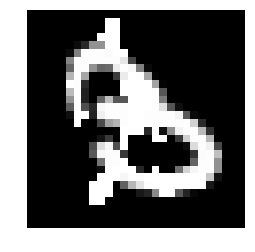

--------------------------------------
Creating adv. example for target class 2
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 3
Current iteration: 10 - Current Prediction: 8
Current iteration: 15 - Current Prediction: 8
Current iteration: 20 - Current Prediction: 8
Current iteration: 25 - Current Prediction: 8
Current iteration: 30 - Current Prediction: 8
Successful


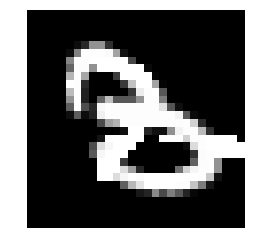

--------------------------------------
Creating adv. example for target class 4
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 3
Current iteration: 10 - Current Prediction: 3
Current iteration: 15 - Current Prediction: 3
Current iteration: 20 - Current Prediction: 3
Current iteration: 25 - Current Prediction: 3
Successful


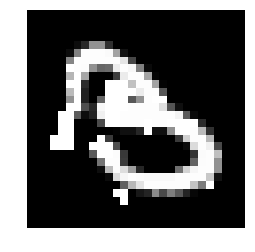

--------------------------------------
Creating adv. example for target class 5
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 3
Current iteration: 10 - Current Prediction: 3
Successful


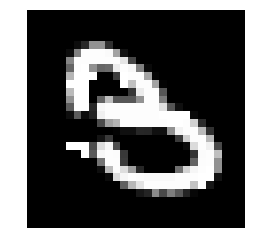

--------------------------------------
Creating adv. example for target class 6
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 3
Current iteration: 10 - Current Prediction: 8
Current iteration: 15 - Current Prediction: 6
Successful


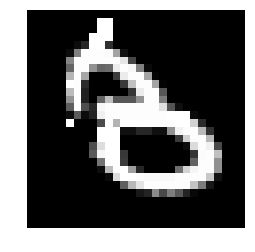

--------------------------------------
Creating adv. example for target class 7
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 3
Current iteration: 10 - Current Prediction: 3
Current iteration: 15 - Current Prediction: 3
Current iteration: 20 - Current Prediction: 3
Current iteration: 25 - Current Prediction: 8
Current iteration: 30 - Current Prediction: 3
Current iteration: 35 - Current Prediction: 8
Unsuccesful


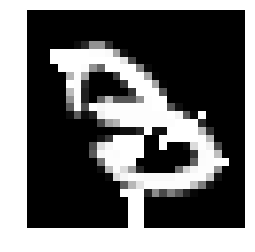

--------------------------------------
Creating adv. example for target class 8
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 3
Successful


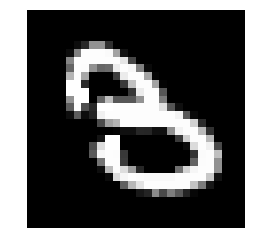

--------------------------------------
Creating adv. example for target class 9
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 3
Current iteration: 10 - Current Prediction: 3
Current iteration: 15 - Current Prediction: 3
Current iteration: 20 - Current Prediction: 3
Current iteration: 25 - Current Prediction: 9
Successful


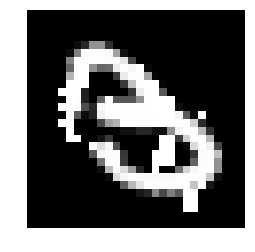

--------------------------------------
Creating adv. example for target class 0
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 4
Current iteration: 10 - Current Prediction: 4
Successful


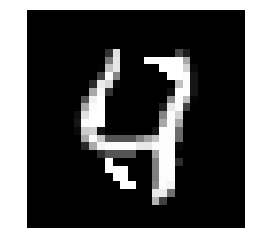

--------------------------------------
Creating adv. example for target class 1
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 4
Current iteration: 10 - Current Prediction: 4
Current iteration: 15 - Current Prediction: 4
Current iteration: 20 - Current Prediction: 4
Successful


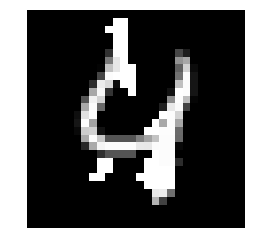

--------------------------------------
Creating adv. example for target class 2
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 4
Current iteration: 10 - Current Prediction: 4
Current iteration: 15 - Current Prediction: 2
Successful


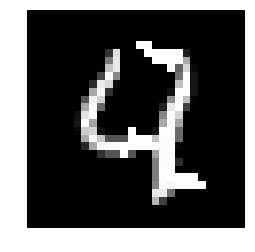

--------------------------------------
Creating adv. example for target class 3
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 4
Current iteration: 10 - Current Prediction: 9
Current iteration: 15 - Current Prediction: 3
Successful


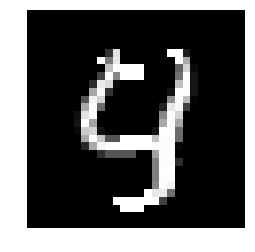

--------------------------------------
Creating adv. example for target class 5
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 4
Current iteration: 10 - Current Prediction: 4
Current iteration: 15 - Current Prediction: 4
Successful


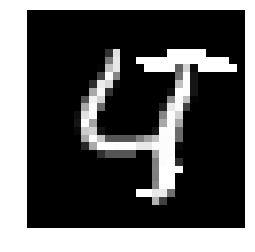

--------------------------------------
Creating adv. example for target class 6
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 4
Successful


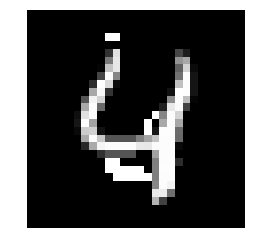

--------------------------------------
Creating adv. example for target class 7
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 4
Current iteration: 10 - Current Prediction: 7
Successful


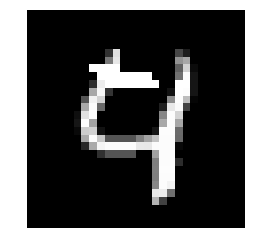

--------------------------------------
Creating adv. example for target class 8
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 4
Current iteration: 10 - Current Prediction: 4
Successful


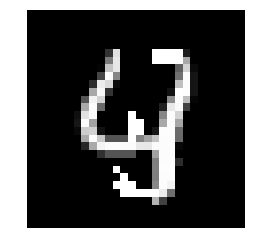

--------------------------------------
Creating adv. example for target class 9
Maximum number of iterations: 39.0
Successful


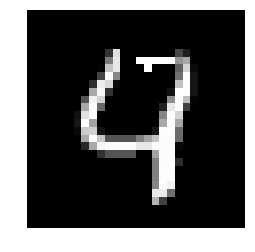

--------------------------------------
Creating adv. example for target class 0
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 5
Current iteration: 10 - Current Prediction: 5
Current iteration: 15 - Current Prediction: 5
Successful


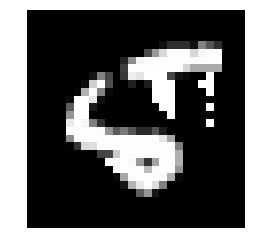

--------------------------------------
Creating adv. example for target class 1
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 5
Current iteration: 10 - Current Prediction: 5
Current iteration: 15 - Current Prediction: 5
Current iteration: 20 - Current Prediction: 6
Current iteration: 25 - Current Prediction: 8
Current iteration: 30 - Current Prediction: 8
Current iteration: 35 - Current Prediction: 8
Unsuccesful


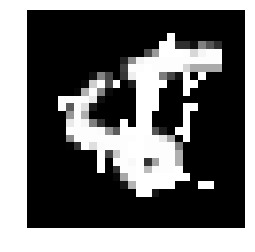

--------------------------------------
Creating adv. example for target class 2
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 5
Current iteration: 10 - Current Prediction: 5
Successful


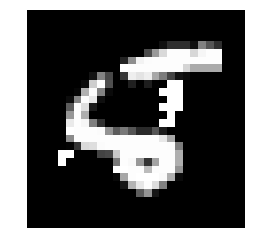

--------------------------------------
Creating adv. example for target class 3
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 5
Current iteration: 10 - Current Prediction: 5
Current iteration: 15 - Current Prediction: 5
Current iteration: 20 - Current Prediction: 8
Current iteration: 25 - Current Prediction: 8
Current iteration: 30 - Current Prediction: 8
Current iteration: 35 - Current Prediction: 8
Unsuccesful


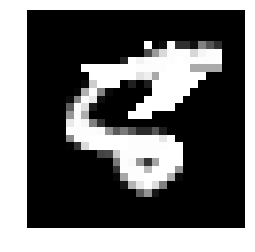

--------------------------------------
Creating adv. example for target class 4
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 5
Current iteration: 10 - Current Prediction: 5
Current iteration: 15 - Current Prediction: 5
Successful


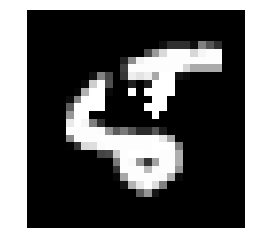

--------------------------------------
Creating adv. example for target class 6
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 5
Current iteration: 10 - Current Prediction: 5
Successful


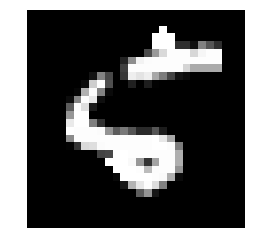

--------------------------------------
Creating adv. example for target class 7
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 5
Current iteration: 10 - Current Prediction: 5
Current iteration: 15 - Current Prediction: 5
Successful


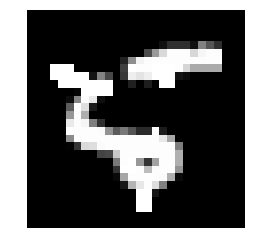

--------------------------------------
Creating adv. example for target class 8
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 5
Successful


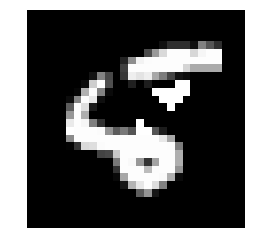

--------------------------------------
Creating adv. example for target class 9
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 5
Successful


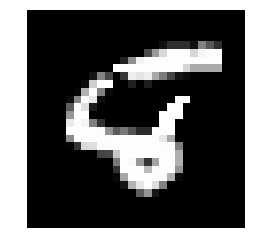

--------------------------------------
Creating adv. example for target class 0
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 6
Current iteration: 10 - Current Prediction: 0
Successful


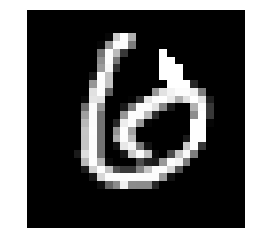

--------------------------------------
Creating adv. example for target class 1
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 6
Current iteration: 10 - Current Prediction: 6
Current iteration: 15 - Current Prediction: 6
Current iteration: 20 - Current Prediction: 6
Current iteration: 25 - Current Prediction: 1
Successful


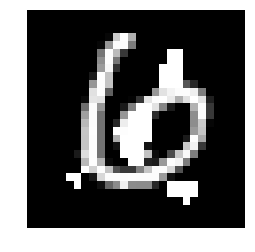

--------------------------------------
Creating adv. example for target class 2
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 6
Current iteration: 10 - Current Prediction: 6
Successful


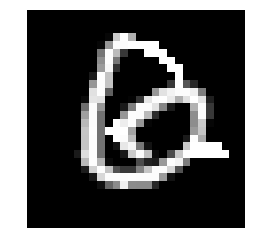

--------------------------------------
Creating adv. example for target class 3
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 6
Current iteration: 10 - Current Prediction: 6
Current iteration: 15 - Current Prediction: 6
Current iteration: 20 - Current Prediction: 3
Successful


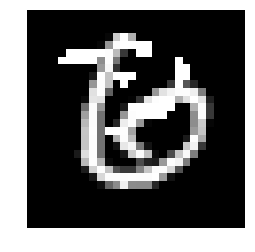

--------------------------------------
Creating adv. example for target class 4
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 6
Current iteration: 10 - Current Prediction: 6
Current iteration: 15 - Current Prediction: 6
Current iteration: 20 - Current Prediction: 6
Successful


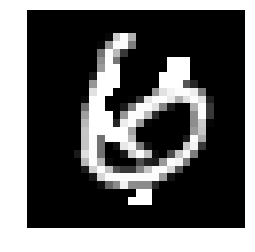

--------------------------------------
Creating adv. example for target class 5
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 6
Current iteration: 10 - Current Prediction: 6
Current iteration: 15 - Current Prediction: 6
Current iteration: 20 - Current Prediction: 6
Successful


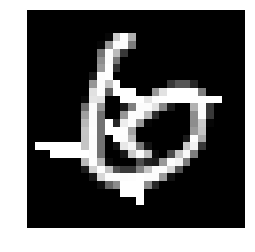

--------------------------------------
Creating adv. example for target class 7
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 6
Current iteration: 10 - Current Prediction: 6
Current iteration: 15 - Current Prediction: 6
Current iteration: 20 - Current Prediction: 6
Current iteration: 25 - Current Prediction: 6
Current iteration: 30 - Current Prediction: 7
Successful


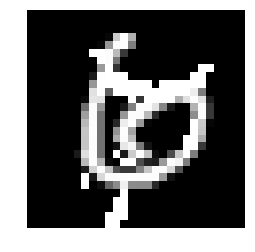

--------------------------------------
Creating adv. example for target class 8
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 6
Current iteration: 10 - Current Prediction: 6
Successful


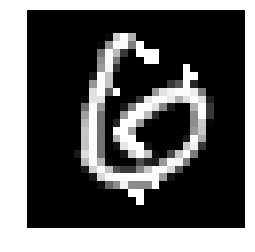

--------------------------------------
Creating adv. example for target class 9
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 6
Current iteration: 10 - Current Prediction: 8
Current iteration: 15 - Current Prediction: 8
Current iteration: 20 - Current Prediction: 8
Successful


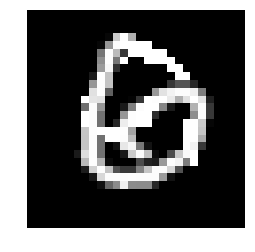

--------------------------------------
Creating adv. example for target class 0
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 7
Current iteration: 10 - Current Prediction: 7
Current iteration: 15 - Current Prediction: 0
Successful


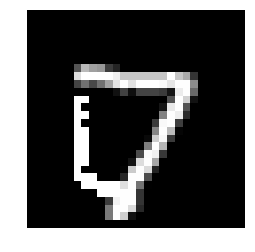

--------------------------------------
Creating adv. example for target class 1
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 7
Current iteration: 10 - Current Prediction: 7
Current iteration: 15 - Current Prediction: 7
Current iteration: 20 - Current Prediction: 7
Current iteration: 25 - Current Prediction: 7
Current iteration: 30 - Current Prediction: 7
Current iteration: 35 - Current Prediction: 7
Successful


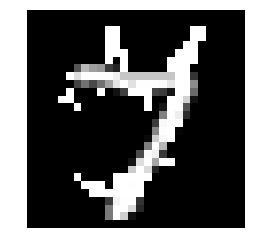

--------------------------------------
Creating adv. example for target class 2
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 7
Current iteration: 10 - Current Prediction: 7
Current iteration: 15 - Current Prediction: 7
Successful


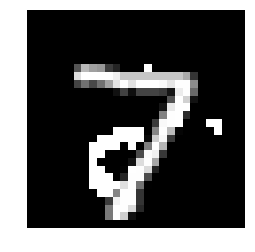

--------------------------------------
Creating adv. example for target class 3
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 7
Successful


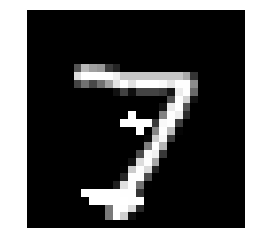

--------------------------------------
Creating adv. example for target class 4
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 7
Current iteration: 10 - Current Prediction: 7
Current iteration: 15 - Current Prediction: 7
Current iteration: 20 - Current Prediction: 7
Current iteration: 25 - Current Prediction: 7
Successful


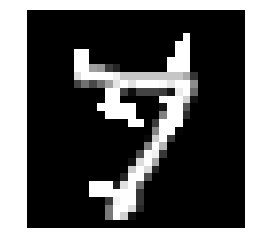

--------------------------------------
Creating adv. example for target class 5
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 7
Current iteration: 10 - Current Prediction: 7
Successful


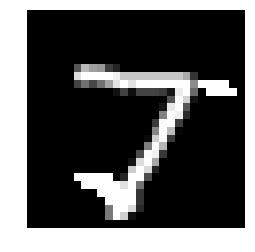

--------------------------------------
Creating adv. example for target class 6
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 7
Current iteration: 10 - Current Prediction: 7
Current iteration: 15 - Current Prediction: 7
Successful


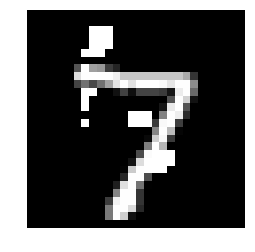

--------------------------------------
Creating adv. example for target class 8
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 7
Current iteration: 10 - Current Prediction: 7
Successful


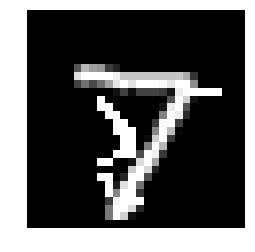

--------------------------------------
Creating adv. example for target class 9
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 7
Current iteration: 10 - Current Prediction: 9
Successful


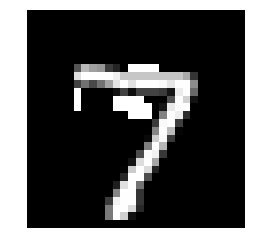

--------------------------------------
Creating adv. example for target class 0
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 8
Current iteration: 10 - Current Prediction: 8
Successful


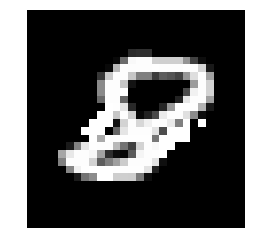

--------------------------------------
Creating adv. example for target class 1
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 8
Current iteration: 10 - Current Prediction: 8
Current iteration: 15 - Current Prediction: 8
Current iteration: 20 - Current Prediction: 8
Current iteration: 25 - Current Prediction: 8
Current iteration: 30 - Current Prediction: 2
Current iteration: 35 - Current Prediction: 2
Successful


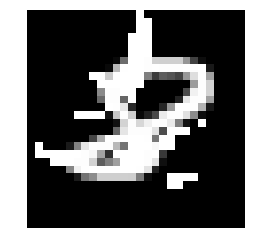

--------------------------------------
Creating adv. example for target class 2
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 8
Current iteration: 10 - Current Prediction: 8
Current iteration: 15 - Current Prediction: 2
Successful


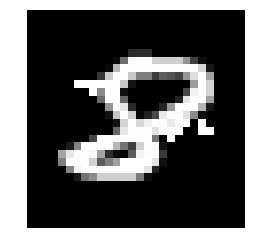

--------------------------------------
Creating adv. example for target class 3
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 8
Current iteration: 10 - Current Prediction: 8
Current iteration: 15 - Current Prediction: 8
Current iteration: 20 - Current Prediction: 8
Current iteration: 25 - Current Prediction: 3
Successful


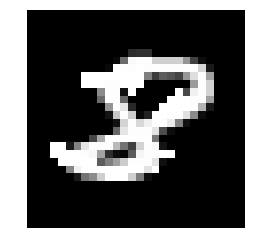

--------------------------------------
Creating adv. example for target class 4
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 8
Current iteration: 10 - Current Prediction: 8
Current iteration: 15 - Current Prediction: 8
Current iteration: 20 - Current Prediction: 8
Current iteration: 25 - Current Prediction: 8
Current iteration: 30 - Current Prediction: 8
Current iteration: 35 - Current Prediction: 8
Unsuccesful


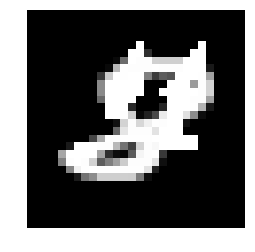

--------------------------------------
Creating adv. example for target class 5
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 8
Current iteration: 10 - Current Prediction: 8
Current iteration: 15 - Current Prediction: 8
Current iteration: 20 - Current Prediction: 8
Successful


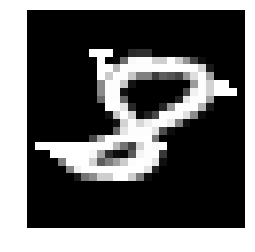

--------------------------------------
Creating adv. example for target class 6
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 8
Current iteration: 10 - Current Prediction: 8
Current iteration: 15 - Current Prediction: 8
Current iteration: 20 - Current Prediction: 8
Current iteration: 25 - Current Prediction: 8
Current iteration: 30 - Current Prediction: 8
Successful


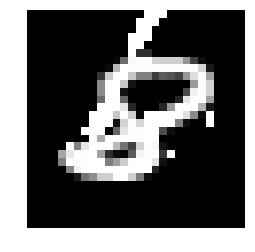

--------------------------------------
Creating adv. example for target class 7
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 8
Current iteration: 10 - Current Prediction: 8
Current iteration: 15 - Current Prediction: 8
Current iteration: 20 - Current Prediction: 8
Successful


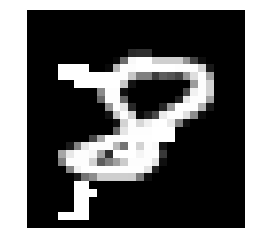

--------------------------------------
Creating adv. example for target class 9
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 8
Current iteration: 10 - Current Prediction: 8
Current iteration: 15 - Current Prediction: 8
Current iteration: 20 - Current Prediction: 8
Current iteration: 25 - Current Prediction: 9
Successful


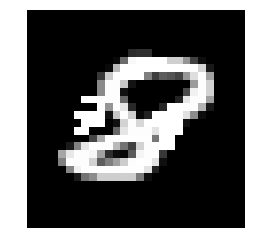

--------------------------------------
Creating adv. example for target class 0
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 9
Current iteration: 10 - Current Prediction: 9
Current iteration: 15 - Current Prediction: 9
Current iteration: 20 - Current Prediction: 8
Current iteration: 25 - Current Prediction: 8
Current iteration: 30 - Current Prediction: 8
Current iteration: 35 - Current Prediction: 8
Successful


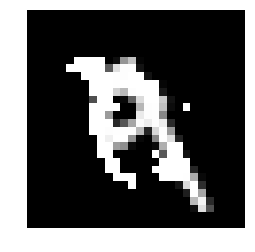

--------------------------------------
Creating adv. example for target class 1
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 9
Current iteration: 10 - Current Prediction: 9
Current iteration: 15 - Current Prediction: 9
Current iteration: 20 - Current Prediction: 4
Successful


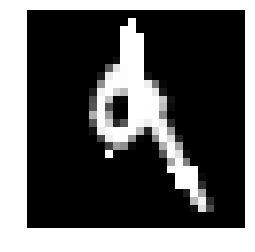

--------------------------------------
Creating adv. example for target class 2
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 9
Current iteration: 10 - Current Prediction: 9
Current iteration: 15 - Current Prediction: 2
Successful


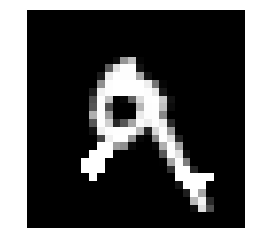

--------------------------------------
Creating adv. example for target class 3
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 9
Current iteration: 10 - Current Prediction: 9
Current iteration: 15 - Current Prediction: 9
Successful


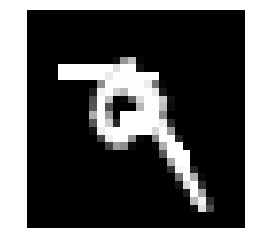

--------------------------------------
Creating adv. example for target class 4
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 9
Successful


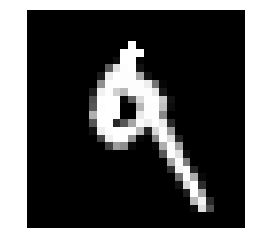

--------------------------------------
Creating adv. example for target class 5
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 9
Current iteration: 10 - Current Prediction: 9
Successful


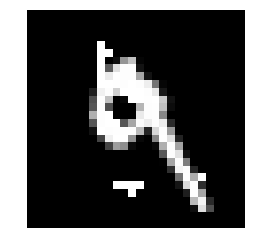

--------------------------------------
Creating adv. example for target class 6
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 9
Current iteration: 10 - Current Prediction: 9
Successful


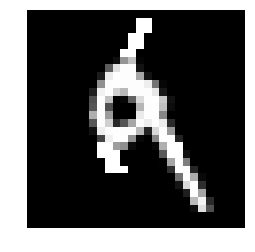

--------------------------------------
Creating adv. example for target class 7
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 9
Current iteration: 10 - Current Prediction: 9
Current iteration: 15 - Current Prediction: 9
Successful


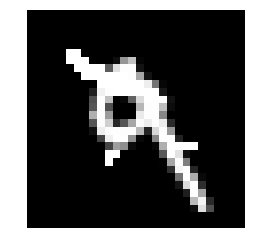

--------------------------------------
Creating adv. example for target class 8
Maximum number of iterations: 39.0
Current iteration: 5 - Current Prediction: 8
Successful


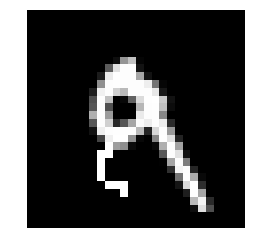

Avg. rate of successful adv. examples 0.11
Avg. rate of perturbed features 0.00
Avg. rate of perturbed features for successful adversarial examples 0.00


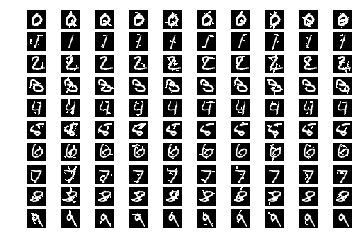

In [9]:
###########################################################################
# Craft adversarial examples using the Jacobian-based saliency map approach
###########################################################################
print('Crafting ' + str(FLAGS.source_samples) + ' * ' +
      str(FLAGS.nb_classes-1) + ' adversarial examples')

# This array indicates whether an adversarial example was found for each
# test set sample and target class
results = np.zeros((FLAGS.nb_classes, FLAGS.source_samples), dtype='i')

# This array contains the fraction of perturbed features for each test set
# sample and target class
perturbations = np.zeros((FLAGS.nb_classes, FLAGS.source_samples),
                         dtype='f')

# Define the TF graph for the model's Jacobian
grads = jacobian_graph(predictions_1, x, FLAGS.nb_classes)

# Initialize our array for grid visualization
grid_shape = (FLAGS.nb_classes,
              FLAGS.nb_classes,
              FLAGS.img_rows,
              FLAGS.img_cols,
              FLAGS.nb_channels)
grid_viz_data = np.zeros(grid_shape, dtype='f')

index = [3,2,1,18,4,8,11,0,61,7]

# Loop over the samples we want to perturb into adversarial examples
i = 0
for sample_ind in index:
    # We want to find an adversarial example for each possible target class
    # (i.e. all classes that differ from the label given in the dataset)
    current_class = int(np.argmax(Y_test[sample_ind]))
    target_classes = other_classes(FLAGS.nb_classes, current_class)

    # For the grid visualization, keep original images along the diagonal
    grid_viz_data[current_class, current_class, :, :, :] = np.reshape(
            X_test[sample_ind:(sample_ind+1)],
            (FLAGS.img_rows, FLAGS.img_cols, FLAGS.nb_channels))

    # Loop over all target classes
    for target in target_classes:
        print('--------------------------------------')
        print('Creating adv. example for target class ' + str(target))

        # This call runs the Jacobian-based saliency map approach
        adv_x, res, percent_perturb = jsma(sess, x, predictions_1, grads,
                                           X_test[sample_ind:
                                                  (sample_ind+1)],
                                           target, theta=1, gamma=0.1,
                                           increase=True, back='tf',
                                           clip_min=0, clip_max=1)

        # Display the original and adversarial images side-by-side
        if FLAGS.viz_enabled:
            if 'figure' not in vars():
                    figure = pair_visual(
                            np.reshape(X_test[sample_ind:(sample_ind+1)],
                                       (FLAGS.img_rows, FLAGS.img_cols)),
                            np.reshape(adv_x,
                                       (FLAGS.img_rows, FLAGS.img_cols)))
            else:
                figure = pair_visual(
                        np.reshape(X_test[sample_ind:(sample_ind+1)],
                                   (FLAGS.img_rows, FLAGS.img_cols)),
                        np.reshape(adv_x, (FLAGS.img_rows,
                                   FLAGS.img_cols)), figure)

        # Add our adversarial example to our grid data
        grid_viz_data[target, current_class, :, :, :] = np.reshape(
                adv_x, (FLAGS.img_rows, FLAGS.img_cols, FLAGS.nb_channels))

        # Update the arrays for later analysis
        results[target, i] = res
        perturbations[target, i] = percent_perturb

# Compute the number of adversarial examples that were successfuly found
nb_targets_tried = ((FLAGS.nb_classes - 1) * FLAGS.source_samples)
succ_rate = float(np.sum(results)) / nb_targets_tried
print('Avg. rate of successful adv. examples {0:.2f}'.format(succ_rate))

# Compute the average distortion introduced by the algorithm
percent_perturbed = np.mean(perturbations)
print('Avg. rate of perturbed features {0:.2f}'.format(percent_perturbed))

# Compute the average distortion introduced for successful samples only
percent_perturb_succ = np.mean(perturbations * (results == 1))
print('Avg. rate of perturbed features for successful '
      'adversarial examples {0:.2f}'.format(percent_perturb_succ))

# Close TF session
sess.close()

# Finally, block & display a grid of all the adversarial examples
if FLAGS.viz_enabled:
    _ = grid_visual(grid_viz_data)

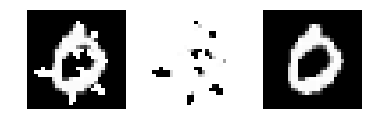

0.09948979591836735

In [33]:
# demon a advesarial example
img_rows = 28;
img_cols = 28;
figure = pair_visual(np.reshape(grid_viz_data[4][0],
                                (img_rows, img_cols)),
                     np.reshape(grid_viz_data[0][0],(img_rows, img_cols)))
x = np.reshape(grid_viz_data[4][0],(img_rows, img_cols)) - np.reshape(grid_viz_data[0][0],(img_rows, img_cols))
np.count_nonzero(x)
float(62/(28*28))
float(39*2/(28*28))

## pack

In [10]:
from six.moves import cPickle as pickle
pickle_file = 'adv_jsma_G11.pickle'

try:
    f = open(pickle_file, 'wb')
    save = {
        'adv_dataset': grid_viz_data,
        }
    pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
    f.close()
except Exception as e:
    print('Unable to save data to', pickle_file, ':', e)
    raise

In [11]:
from six.moves import cPickle as pickle
pickle_file = 'adv_jsma_G11.pickle'

with open(pickle_file, 'rb') as f:
    save = pickle.load(f)
    adv_dataset = save['adv_dataset']
    del save  # hint to help gc free up memory
    print('Test set', adv_dataset.shape)

Test set (10, 10, 28, 28, 1)


In [12]:
def model_eval_single(sess, x, y, model, X_test, args=None):
    """
    Compute the accuracy of a TF model on some data
    :param sess: TF session to use when training the graph
    :param x: input placeholder
    :param y: output placeholder (for labels)
    :param model: model output predictions
    :param X_test: numpy array with training inputs
    :param Y_test: numpy array with training outputs
    :param args: dict or argparse `Namespace` object.
                 Should contain `batch_size`
    :return: a float with the accuracy value
    """

    # Define symbol for accuracy
    # Keras 2.0 categorical_accuracy no longer calculates the mean internally
    # tf.reduce_mean is called in here and is backward compatible with previous
    # versions of Keras
    acc_value = model


    with sess.as_default():
        cur_acc = acc_value.eval(
            feed_dict={x: X_test,
                       keras.backend.learning_phase(): 0})


        # Divide by number of examples to get final value
        accuracy = cur_acc

    return accuracy

In [14]:
accuracy = model_eval_single(sess, x, y, predictions_1, X_test[0:3], Y_test)
print(accuracy)

[[ 0.0947522   0.09726564  0.09869497  0.11104508  0.10063614  0.10713132
   0.09639183  0.10044535  0.09564225  0.09799524]
 [ 0.09529196  0.09829812  0.0990233   0.11030627  0.09991632  0.1124934
   0.0969669   0.09805311  0.0957875   0.09386314]
 [ 0.09558042  0.09791765  0.0995901   0.10551623  0.10045564  0.10995198
   0.0968787   0.10074896  0.09691475  0.0964456 ]]


In [13]:
inp = grid_viz_data[7][7]
inp = np.reshape(inp, (1,28,28,1))
sess = tf.Session()
keras.backend.set_session(sess)
init_op = tf.global_variables_initializer()
sess.run(init_op)
accuracy = model_eval_single(sess, x, y, predictions_1, X_test[0:1], Y_test)
print(accuracy)

[[ 0.09475221  0.09726563  0.09869497  0.11104508  0.10063614  0.10713132
   0.09639183  0.10044536  0.09564225  0.09799524]]


In [45]:
inp = np.reshape(inp,(28,28,1))

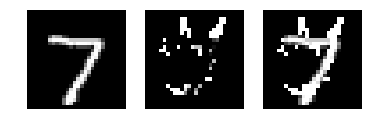

In [16]:
img_rows = 28
img_cols = 28
figure = pair_visual(np.reshape(inp,
                                (img_rows, img_cols)),
                     np.reshape(grid_viz_data[1][7],(img_rows, img_cols)))